In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datasist as ds

In [2]:
training_df = pd.read_csv("cs-training.csv")
test_df = pd.read_csv("cs-test.csv")
sampleEntry_df = pd.read_csv("sampleEntry.csv")

In [3]:
training_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
test_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


## DATA EXPLORATION 

In [5]:
training_df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


### Some interesting observation from this description are:

1. Unnamed is probably an ID field and after further investigation will be dropped, as ID fields like this do not contribute to model's prediction. 
2. RevolvingUtilizationOfUnsecuredLines looks heavily skewed, as the maximun value is extremely high and far from the quartiles. This is also evident in the calculated mean. 
3. Age has a tendency to contain outliers and incorrect data because the minimum age is 0, and that is not a valid age even for banking. 
* The maximum value for age is 109. This also seems strange. It is rare to find a persons of that age engage in borrowing. 
* The mean age is around 52. 
4. NumberOfTime30-59DaysPastDueNotWorse is also heavily skewed and looks like it contains some outliers. The quartiles are mostly zero, and the mean is close to zero, but the max value is aroud 98!
5. Debt ratio is skewed. 
6. There are some missing values in monthly income. The minimum of monthly income is zero, which seems strange. Are people without monthly income eligible for borrowing?
7. NumberOfTimes90DaysLate, NumberRealEstateLoansOrLines and NumberOfTime60-89DaysPastDueNotWorse are also heavily skewed and may contain extreme outliers. 

### Investigating some of the interesting findings with visualization

In [6]:
training_df['Unnamed: 0'].nunique()

150000

In [7]:
#drop Unnamed column
training_df.drop(columns=['Unnamed: 0'], inplace=True)
test_df.drop(columns=['Unnamed: 0'], inplace=True)

--------------------------------------------
#### TARGET OF INTEREST

In [8]:
training_df['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

Text(0.5, 1.0, 'Count plot of classes in target column')

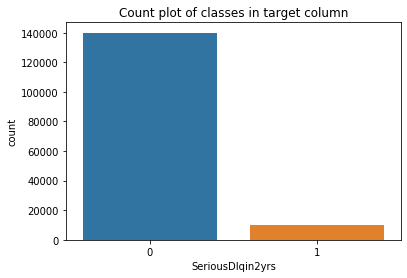

In [9]:
sns.countplot(training_df['SeriousDlqin2yrs'])
plt.title("Count plot of classes in target column")

__Finding:__ The target is quite imbalanced, as we have more zeros (0), than (1). This makes the problem tougher of many machine learning algorithms. 

----------------------------
## Feature RevolvingUtilizationOfUnsecuredLines

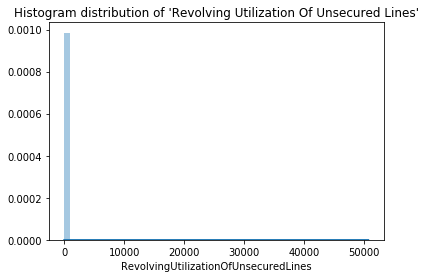

In [10]:
sns.distplot(training_df['RevolvingUtilizationOfUnsecuredLines'])
plt.title("Histogram distribution of 'Revolving Utilization Of Unsecured Lines'")
plt.show()

In [11]:
training_df['RevolvingUtilizationOfUnsecuredLines'].value_counts()

0.000000    10878
1.000000    10256
1.000000       17
0.950100        8
0.713147        6
            ...  
0.486200        1
0.039377        1
0.030780        1
0.355181        1
0.168611        1
Name: RevolvingUtilizationOfUnsecuredLines, Length: 125728, dtype: int64

### Majority of the values fall between 1 and 0. We'll round up the percentage to 1 decimal place to get an even distribution of values

In [12]:
training_df['RevolvingUtilizationOfUnsecuredLines'] = training_df['RevolvingUtilizationOfUnsecuredLines'].round(2)
test_df['RevolvingUtilizationOfUnsecuredLines'] = test_df['RevolvingUtilizationOfUnsecuredLines'].round(2)

training_df['RevolvingUtilizationOfUnsecuredLines'].value_counts()

0.00        17276
1.00        10958
0.01         9384
0.02         7653
0.03         6210
            ...  
1785.00         1
2.04            1
3572.00         1
10209.00        1
10151.00        1
Name: RevolvingUtilizationOfUnsecuredLines, Length: 537, dtype: int64

#### Create a feature RevolvingUtilizationOfUnsecuredLines tracking the modal class 0.0


In [13]:
training_df['RevolvingUtilizationOfUnsecuredLines_is_zero'] = training_df['RevolvingUtilizationOfUnsecuredLines'].map(lambda x: "yes" if x == 0.0 else "No")
test_df['RevolvingUtilizationOfUnsecuredLines_is_zero'] = test_df['RevolvingUtilizationOfUnsecuredLines'].map(lambda x: "yes" if x == 0.0 else "No")

In [14]:
training_df['RevolvingUtilizationOfUnsecuredLines_is_zero'].value_counts()

No     132724
yes     17276
Name: RevolvingUtilizationOfUnsecuredLines_is_zero, dtype: int64

In [15]:
training_df[training_df['RevolvingUtilizationOfUnsecuredLines'] > 100].shape

(223, 12)

#### Ratios/Percentages are generally between the range of 0-100. But I noticed the dataset has numerous RevolvingUtilizationOfUnsecuredLines ration values above 100. We can decide to remove these instance, or model with it as they may be part of the data definition.

--------------------------------------
## Feature Age

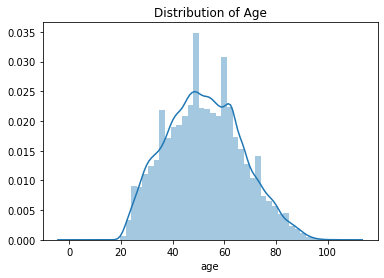

In [16]:
sns.distplot(training_df['age'])
plt.title("Distribution of Age")
plt.show()

Age is normally distributed, and centered around 20-90. We notice an extreme value of 109 and 0 earlier. We'll investigate this further. 

In [17]:
training_df[training_df['age'].isin(list(range(0,18)))]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RevolvingUtilizationOfUnsecuredLines_is_zero
65695,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0,No


#### The zero age is probably incorrect data imputation, as no charge is supposed to be below 18 years. We'll remove these instances from the data

In [18]:
training_df.drop([65695], inplace=True)

In [19]:
test_df[test_df['age'].isin(list(range(0,18)))]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RevolvingUtilizationOfUnsecuredLines_is_zero


#### There are no zero age in the test data. 
Next we'll study age greater than 100

In [20]:
training_df[training_df['age'] > 100].shape

(13, 12)

In [21]:
test_df[test_df['age'] > 100].shape

(3, 12)

#### There are very few instances of ages greater than 100. SInce we have a couple of these instances in the test set, we'll model with this first. 

---------------------
### Feature NumberOfTime30-59DaysPastDueNotWorse

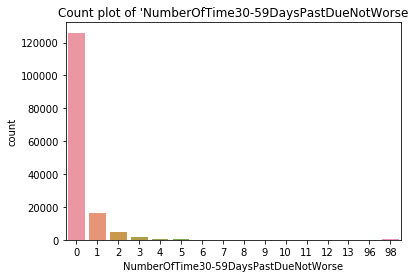

In [22]:
sns.countplot(training_df['NumberOfTime30-59DaysPastDueNotWorse'])
plt.title("Count plot of 'NumberOfTime30-59DaysPastDueNotWorse")
plt.show()

#### Zero (0) is the most popular class, and 96 and 98 appears to be missing value encodings rather than actual values. The suggest using this feature as a categorical feature rather than numeric feature, in order to remove the magnitude. 

In [23]:
temp_mean_tr = training_df['NumberOfTime30-59DaysPastDueNotWorse'].mean()
temp_mean_test = test_df['NumberOfTime30-59DaysPastDueNotWorse'].mean()


training_df['NumberOfTime30-59DaysPastDueNotWorse'].replace(98, temp_mean_tr, inplace=True)
training_df['NumberOfTime30-59DaysPastDueNotWorse'].replace(96, temp_mean_tr,inplace=True)

test_df['NumberOfTime30-59DaysPastDueNotWorse'].replace(98, temp_mean_test, inplace=True)
test_df['NumberOfTime30-59DaysPastDueNotWorse'].replace(96, temp_mean_test, inplace=True)

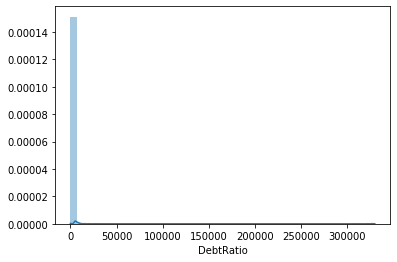

In [24]:
sns.distplot(training_df['DebtRatio'])

In [25]:
training_df['DebtRatio'].value_counts()

0.000000       4113
1.000000        229
4.000000        174
2.000000        170
3.000000        162
               ... 
0.534917          1
3678.000000       1
7030.000000       1
0.162149          1
8416.000000       1
Name: DebtRatio, Length: 114193, dtype: int64

In [26]:
training_df[training_df['DebtRatio'] > 100]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RevolvingUtilizationOfUnsecuredLines_is_zero
6,0,0.31,57,0.0,5710.0,NaN,8,0,3,0,0.0,No
14,0,0.02,76,0.0,477.0,0.0,6,0,1,0,0.0,No
16,0,0.06,78,0.0,2058.0,NaN,10,0,2,0,0.0,No
32,0,0.08,62,0.0,977.0,NaN,6,0,1,0,0.0,No
44,0,0.37,68,0.0,1687.5,1.0,31,0,1,0,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
149967,0,0.98,63,0.0,517.0,NaN,5,0,0,1,0.0,No
149975,0,0.02,58,0.0,2716.0,NaN,8,0,2,0,0.0,No
149977,0,0.24,29,0.0,349.0,NaN,3,0,0,0,0.0,No
149992,0,0.87,50,0.0,4132.0,NaN,11,0,1,0,3.0,No


In [27]:
training_df[(training_df['DebtRatio'] > 100)].shape

(24380, 12)

#### Ratios are generally between the range of 0-100, as it is fractional. But I noticed the dataset has numerous Debt ratio values above 100. We can decide to remove these instance, or model with it as they may be part of the data definition.

--------------
### Feature MonthlyIncome

In [28]:
training_df['MonthlyIncome'].isna().sum()

29731

There are 29731 instances/people with missing record for income. We will tray differnt strategies for fill these missing values

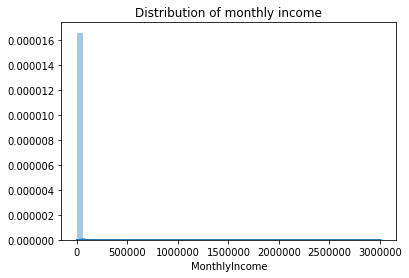

In [29]:
sns.distplot(training_df['MonthlyIncome'])
plt.title("Distribution of monthly income")
plt.show()

In [30]:
training_df['MonthlyIncome'].value_counts().sort_values(ascending=False)

5000.0     2757
4000.0     2106
6000.0     1933
3000.0     1758
0.0        1634
           ... 
21.0          1
9835.0        1
21505.0       1
10753.0       1
1037.0        1
Name: MonthlyIncome, Length: 13594, dtype: int64

In [31]:
print("Training data")
for val in list(range(100000, 1000000, 200000)):
    print(f"Number of people earning {val} is {training_df[training_df['MonthlyIncome'] > val].shape[0]}")
    
print("---------------------------")

print("Test data")
for val in list(range(100000, 1000000, 200000)):
    print(f"Number of people earning {val} is {test_df[test_df['MonthlyIncome'] > val].shape[0]}")

Training data
Number of people earning 100000 is 70
Number of people earning 300000 is 17
Number of people earning 500000 is 12
Number of people earning 700000 is 7
Number of people earning 900000 is 4
---------------------------
Test data
Number of people earning 100000 is 59
Number of people earning 300000 is 9
Number of people earning 500000 is 7
Number of people earning 700000 is 5
Number of people earning 900000 is 4


Very few people earn above 100,000 in the dataset. 

Since the data is highly skewed, using the mean to fill missing values is not encouraged. We'll use the median instead

In [32]:
training_df['MonthlyIncome'].fillna(training_df['MonthlyIncome'].median(), inplace=True)
test_df['MonthlyIncome'].fillna(test_df['MonthlyIncome'].median(), inplace=True)

### Feature NumberOfOpenCreditLinesAndLoans

In [33]:
training_df['NumberOfOpenCreditLinesAndLoans'].isna().sum()

0

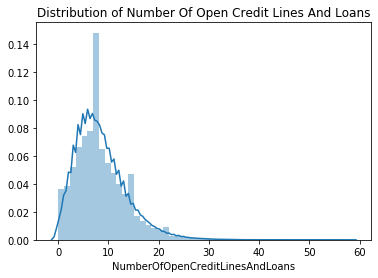

In [34]:
sns.distplot(training_df['NumberOfOpenCreditLinesAndLoans'])
plt.title("Distribution of Number Of Open Credit Lines And Loans")
plt.show()

The number of open credit is centered around 0-20, with few going above 25. 

### Feature NumberOfTimes90DaysLate

In [35]:
training_df['NumberOfTimes90DaysLate'].isna().sum()

0

In [36]:
training_df['NumberOfTimes90DaysLate'].value_counts()

0     141661
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
11         5
96         5
13         4
12         2
14         2
15         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

98 and 96 are probably missing values, and I'll replace them with the mean of the feature

In [37]:
temp_mean_tr = training_df['NumberOfTimes90DaysLate'].mean()
temp_mean_test = test_df['NumberOfTimes90DaysLate'].mean()


training_df['NumberOfTimes90DaysLate'].replace(98, temp_mean_tr, inplace=True)
training_df['NumberOfTimes90DaysLate'].replace(96, temp_mean_tr,inplace=True)

test_df['NumberOfTimes90DaysLate'].replace(98, temp_mean_test, inplace=True)
test_df['NumberOfTimes90DaysLate'].replace(96, temp_mean_test, inplace=True)

### Feature NumberRealEstateLoansOrLines

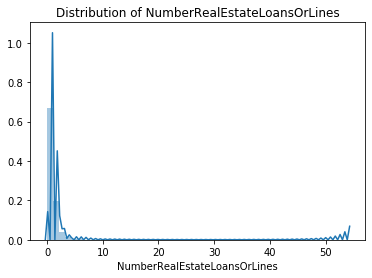

In [38]:
sns.distplot(training_df['NumberRealEstateLoansOrLines'])
plt.title("Distribution of NumberRealEstateLoansOrLines")
plt.show()

In [39]:
test_df['NumberRealEstateLoansOrLines'].value_counts()

0     38066
1     35670
2     20955
3      4423
4      1414
5       452
6       227
7       108
8        58
9        49
10       23
11       19
12       11
14        9
13        5
15        4
16        2
19        2
29        1
18        1
20        1
21        1
25        1
37        1
Name: NumberRealEstateLoansOrLines, dtype: int64

### Feature NumberOfTime60-89DaysPastDueNotWorse

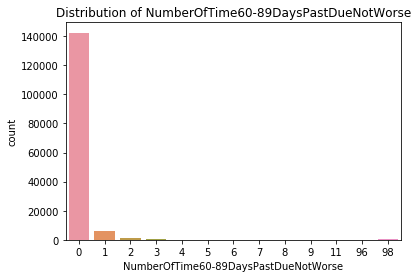

In [40]:
sns.countplot(training_df['NumberOfTime60-89DaysPastDueNotWorse'])
plt.title("Distribution of NumberOfTime60-89DaysPastDueNotWorse")
plt.show()

In [41]:
training_df['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

0     142395
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
11         1
9          1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [42]:
temp_mean_tr = training_df['NumberOfTime60-89DaysPastDueNotWorse'].mean()
temp_mean_test = test_df['NumberOfTime60-89DaysPastDueNotWorse'].mean()


training_df['NumberOfTime60-89DaysPastDueNotWorse'].replace(98, temp_mean_tr, inplace=True)
training_df['NumberOfTime60-89DaysPastDueNotWorse'].replace(96, temp_mean_tr,inplace=True)

test_df['NumberOfTime60-89DaysPastDueNotWorse'].replace(98, temp_mean_test, inplace=True)
test_df['NumberOfTime60-89DaysPastDueNotWorse'].replace(96, temp_mean_test, inplace=True)

----------------------
### Feature NumberOfDependents

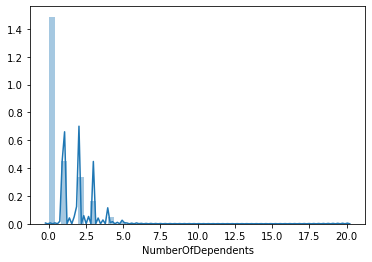

In [43]:
sns.distplot(training_df['NumberOfDependents'])

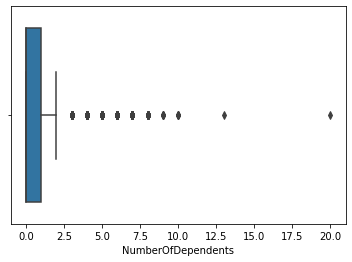

In [44]:
sns.boxplot(training_df['NumberOfDependents'])

In [45]:
training_df['NumberOfDependents'].value_counts()

0.0     86902
1.0     26316
2.0     19521
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64

In [46]:
## Number of missing values
training_df['NumberOfDependents'].isna().sum()

3924

In [47]:
training_df['NumberOfDependents'].fillna(training_df['NumberOfDependents'].median(), inplace=True)
test_df['NumberOfDependents'].fillna(test_df['NumberOfDependents'].median(), inplace=True)

---------------------------------------
### Pairwise Plots and Correlations

In [48]:
training_df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RevolvingUtilizationOfUnsecuredLines_is_zero
0,1,0.77,45,2.0,0.802982,9120.0,13,0.0,6,0.0,2.0,No
1,0,0.96,40,0.0,0.121876,2600.0,4,0.0,0,0.0,1.0,No
2,0,0.66,38,1.0,0.085113,3042.0,2,1.0,0,0.0,0.0,No
3,0,0.23,30,0.0,0.036050,3300.0,5,0.0,0,0.0,0.0,No
4,0,0.91,49,1.0,0.024926,63588.0,7,0.0,1,0.0,0.0,No


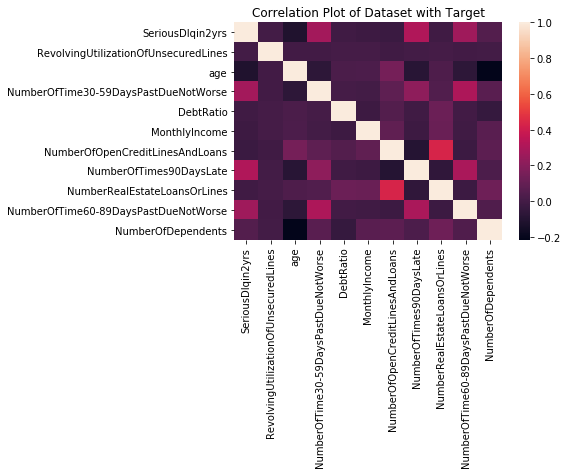

In [49]:
sns.heatmap(training_df.corr())
plt.title("Correlation Plot of Dataset with Target")
plt.show()

The three most highly correlating feature with our target are NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate, NumberOfTime60 89DaysPastDueNotWorse. These are features that counts the past default rates of people, and they tend to be important for predicting future default rates. 

Age is slightly negatively correlated with the target "SeriousDlqin2yrs". Let's investigate this next 

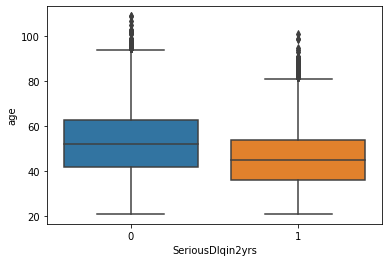

In [50]:
sns.boxplot(data=training_df, x="SeriousDlqin2yrs", y="age")

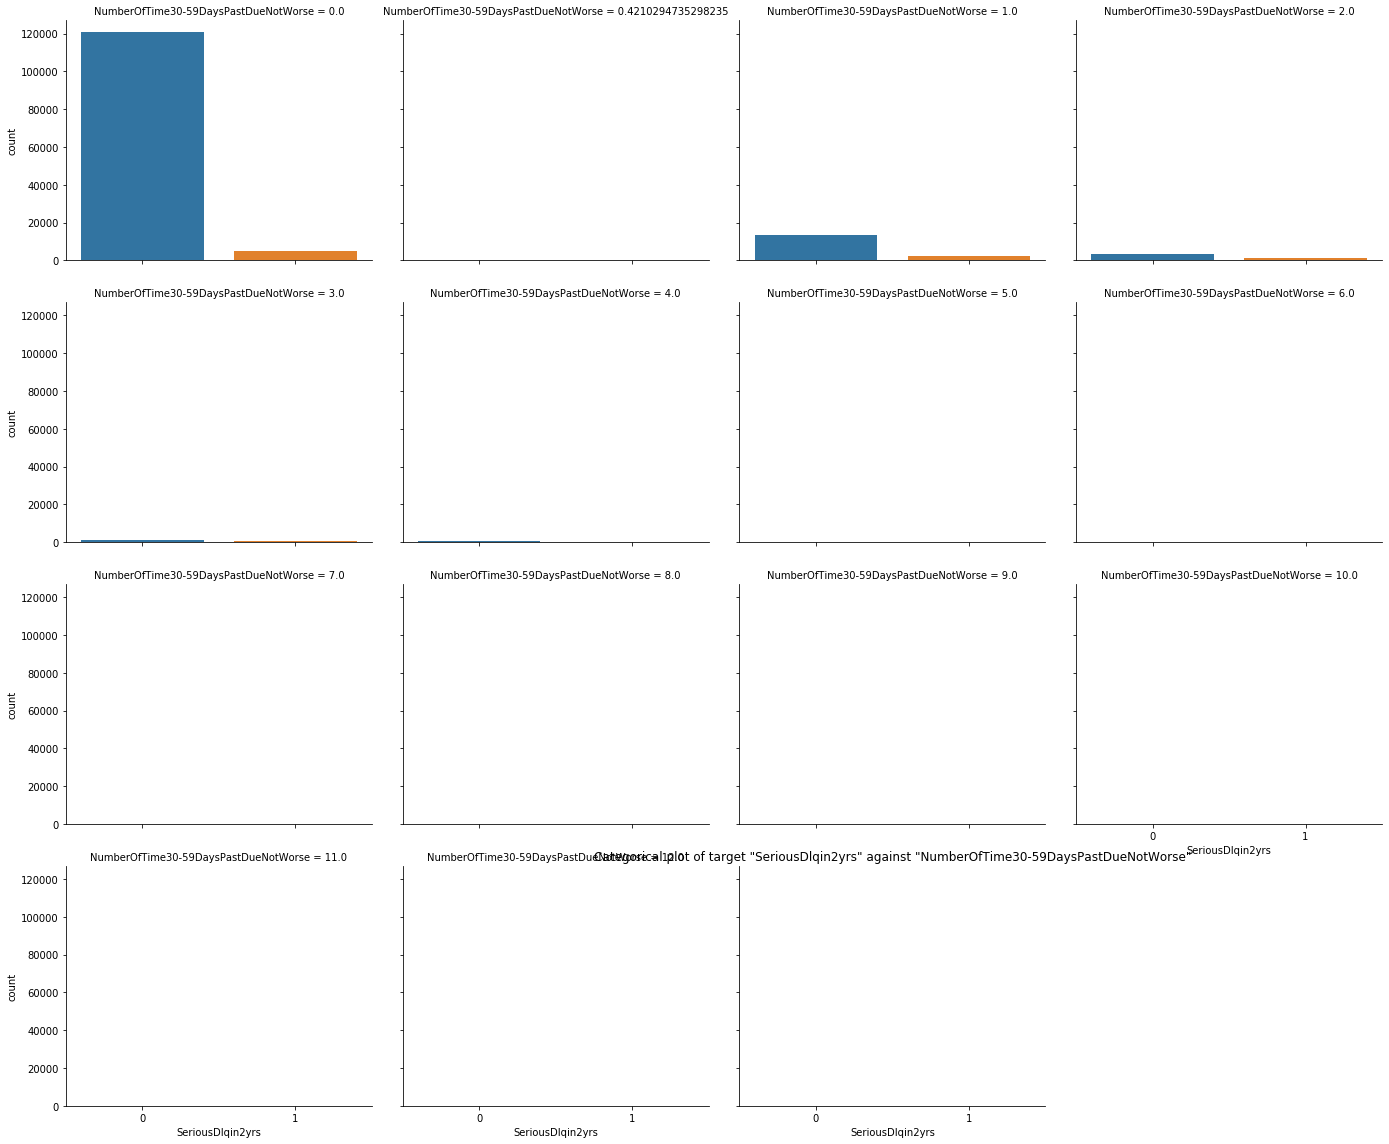

In [51]:
sns.catplot("SeriousDlqin2yrs", col="NumberOfTime30-59DaysPastDueNotWorse", col_wrap=4,
                data=training_df,kind="count", height=4, aspect=1.2)

plt.title('Categorical plot of target "SeriousDlqin2yrs" against "NumberOfTime30-59DaysPastDueNotWorse"')
plt.show()

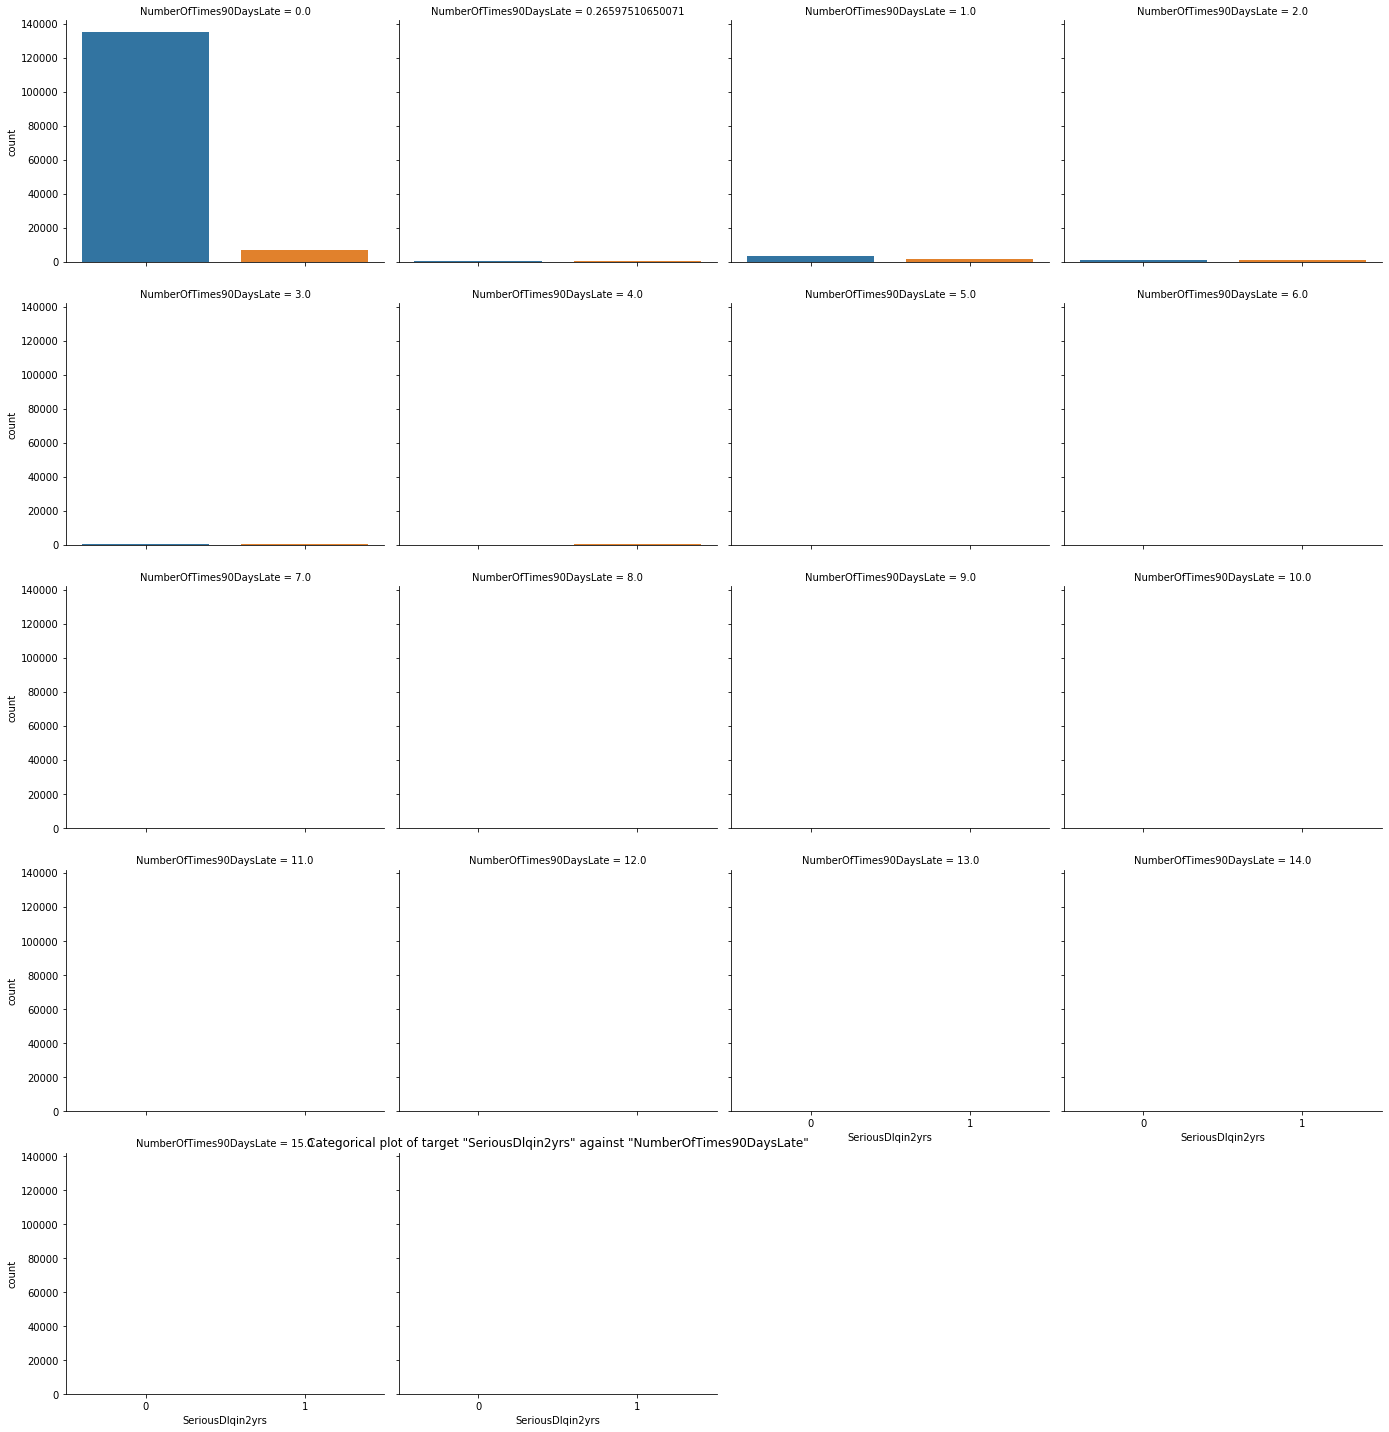

In [52]:
sns.catplot("SeriousDlqin2yrs", col="NumberOfTimes90DaysLate", col_wrap=4,
                data=training_df,kind="count", height=4, aspect=1.2)
plt.title('Categorical plot of target "SeriousDlqin2yrs" against "NumberOfTimes90DaysLate"')
plt.show()

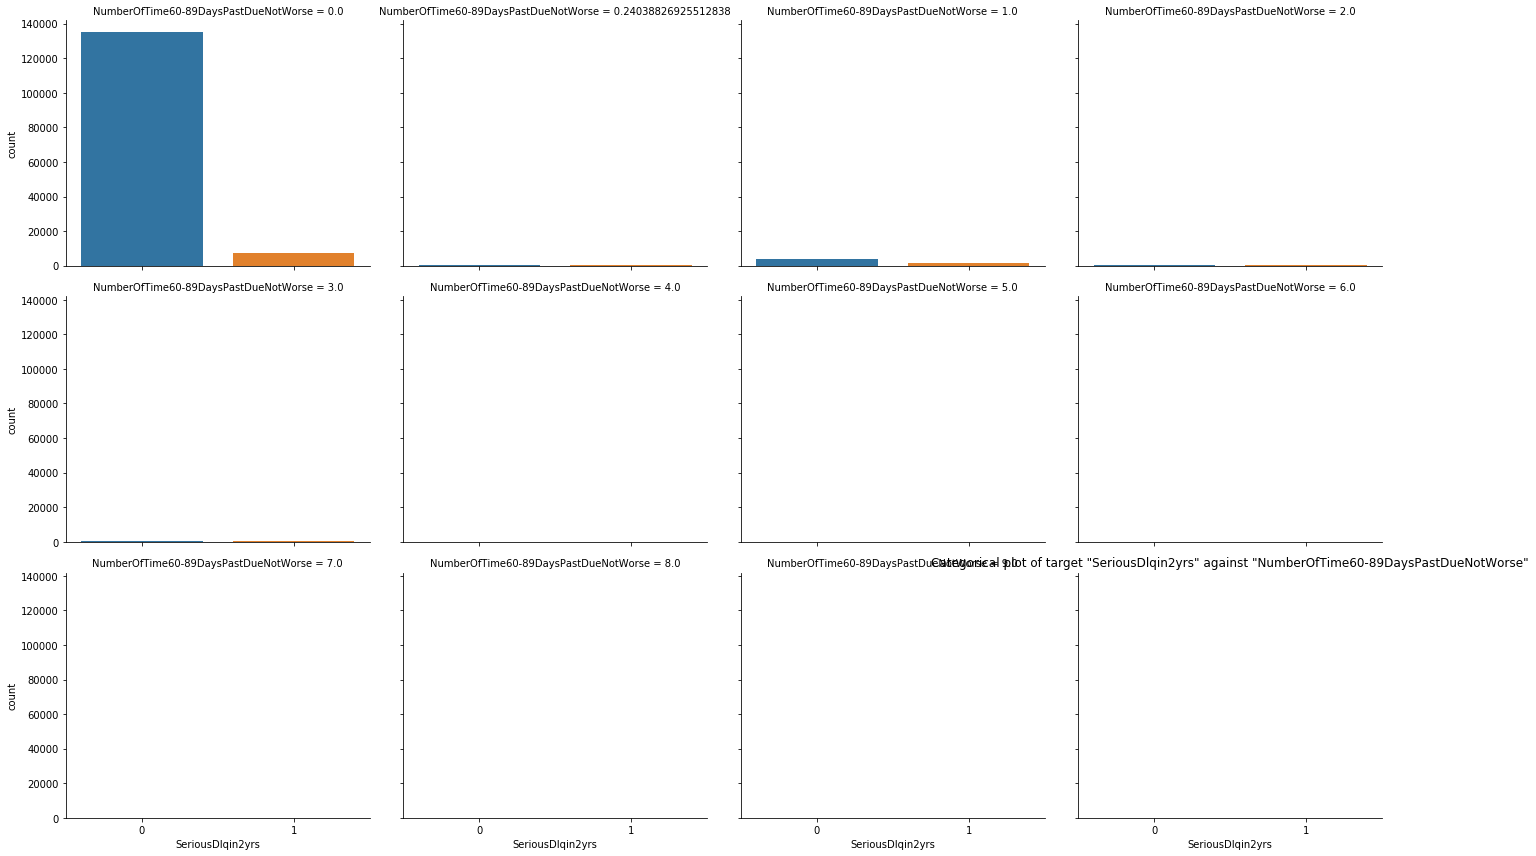

In [53]:
sns.catplot("SeriousDlqin2yrs", col="NumberOfTime60-89DaysPastDueNotWorse", col_wrap=4,
                data=training_df,kind="count", height=4, aspect=1.2)
plt.title('Categorical plot of target "SeriousDlqin2yrs" against "NumberOfTime60-89DaysPastDueNotWorse"')
plt.show()

### The plots above shows that the target of interest appears dominant in few classes, mostly 1s and 0s. We can leverage this information to create classes out of these features. We can capture classes 1 and 0 and group the others as a single class. We will try this later and compare model results.

In [54]:
### One hot encode categorical data
training_df = pd.get_dummies(training_df, drop_first=True)
test_df = pd.get_dummies(test_df, drop_first=True)

In [55]:
## split data into train and test set
from sklearn.model_selection import train_test_split

train = training_df.drop(columns=['SeriousDlqin2yrs'])
test = test_df.drop(columns=['SeriousDlqin2yrs'])

target = training_df.SeriousDlqin2yrs

Xtrain, Xtest, ytrain, ytest = train_test_split(train, target, test_size=0.2, random_state=1)
print(f"Shape of training data: {Xtrain.shape}")
print(f"Shape of training target: {ytrain.shape}")
print(f"Shape of test data: {Xtest.shape}")
print(f"Shape of test target: {ytest.shape}")

Shape of training data: (119999, 11)
Shape of training target: (119999,)
Shape of test data: (30000, 11)
Shape of test target: (30000,)


In [56]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(Xtrain)
Xtrain = sc.transform(Xtrain)
Xtest = sc.transform(Xtest)
## final test data
test = sc.transform(test)

### MODELING

In [57]:
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

import lightgbm as lgb
import xgboost as xgb

### Get a Base model by predicting the popular class

In [62]:
base_preds = [0 for i in range(Xtest.shape[0])]
print(f"Mean Squared Error of Base Model is: {mean_squared_error(base_preds, ytest)}")

Mean Squared Error of Base Model is: 0.06616666666666667


__Note:__ Any model we train must have an error lower than the base model's error of 0.0661 to be considered effective.

In [65]:
def train_and_test(model, model_name):
    model.fit(Xtrain, ytrain)
    pred = model.predict(Xtest)
    print(f"Mean Squared Error of {model_name} Model is: {mean_squared_error(pred, ytest)}")

### Decision Tree

In [66]:
for depth in [3,4,5,6,7,8]:
    dt = DecisionTreeRegressor(max_depth=depth)
    print(f"Max Depth {depth}")
    train_and_test(dt, "Decision Tree")

Max Depth 3
Mean Squared Error of Decision Tree Model is: 0.05114340487615878
Max Depth 4
Mean Squared Error of Decision Tree Model is: 0.0500647207367503
Max Depth 5
Mean Squared Error of Decision Tree Model is: 0.04985098492466053
Max Depth 6
Mean Squared Error of Decision Tree Model is: 0.0497391280779952
Max Depth 7
Mean Squared Error of Decision Tree Model is: 0.050039278622059806
Max Depth 8
Mean Squared Error of Decision Tree Model is: 0.0507199618180286


## Extra Tree

In [67]:
et = ExtraTreeRegressor(random_state=1)
train_and_test(dt, "Extra Tree")

Mean Squared Error of Extra Tree Model is: 0.05069770405281717


## Random Forest

In [192]:
for depth in [3,4,5,6,7,8]:
    rf = RandomForestRegressor(max_depth=depth, n_estimators=200, random_state=1)
    print(f"Max Depth {depth}")
    train_and_test(rf, "Random Forest")

Max Depth 3
Mean Squared Error of Random Forest Model is: 0.0502571003284465
Max Depth 4
Mean Squared Error of Random Forest Model is: 0.04966612317700239
Max Depth 5
Mean Squared Error of Random Forest Model is: 0.04928932403005407
Max Depth 6
Mean Squared Error of Random Forest Model is: 0.04907975582331528
Max Depth 7
Mean Squared Error of Random Forest Model is: 0.04895641847149039
Max Depth 8
Mean Squared Error of Random Forest Model is: 0.04889108405282716


## LightGBM Model

In [68]:
for depth in [3,4,5,6,7,8]:
    lgbmodel = lgb.LGBMRegressor(max_depth=depth, n_estimators=200, num_leaves=40)
    print(f"Max Depth {depth}")
    train_and_test(lgbmodel, "Light GBM")
    

Max Depth 3
Mean Squared Error of Light GBM Model is: 0.04853622873951961
Max Depth 4
Mean Squared Error of Light GBM Model is: 0.04858766489867746
Max Depth 5
Mean Squared Error of Light GBM Model is: 0.048652094288048155
Max Depth 6
Mean Squared Error of Light GBM Model is: 0.04883595916453979
Max Depth 7
Mean Squared Error of Light GBM Model is: 0.048903050326063444
Max Depth 8
Mean Squared Error of Light GBM Model is: 0.04896641500504338


In [197]:
for depth in [3,4,5,6,7,8]:
    xgbmodel = xgb.XGBRegressor(max_depth=depth, n_estimators=500)
    print(f"Max Depth {depth}")
    train_and_test(xgbmodel, "XGBooost")
    

Max Depth 3
Mean Squared Error of XGBooost Model is: 0.04940209850349427
Max Depth 4
Mean Squared Error of XGBooost Model is: 0.050191443762690566
Max Depth 5
Mean Squared Error of XGBooost Model is: 0.05117051826334953
Max Depth 6
Mean Squared Error of XGBooost Model is: 0.05325184351240302
Max Depth 7
Mean Squared Error of XGBooost Model is: 0.05470800595088434
Max Depth 8
Mean Squared Error of XGBooost Model is: 0.05634320677622866


### The best model so far is LigthGBM with max dept of 3 and estimator of 200. I'll investigate and try to improve this model using a Random hyper-parameter searching

In [69]:
from sklearn.model_selection import RandomizedSearchCV

lgbmodel_bst = lgb.LGBMRegressor(max_depth=3, n_estimators=200, num_leaves=40)

    
param_grid = {
    'num_leaves': list(range(8, 92, 4)),
    'min_data_in_leaf': [10, 20, 40, 60, 100],
    'max_depth': [3, 4, 5, 6, 8, 12, 16, -1],
    'learning_rate': [0.1, 0.05, 0.01, 0.005],
    'bagging_freq': [3, 4, 5, 6, 7],
    'bagging_fraction': np.linspace(0.6, 0.95, 10),
    'reg_alpha': np.linspace(0.1, 0.95, 10),
    'reg_lambda': np.linspace(0.1, 0.95, 10),
     "min_split_gain": [0.0, 0.1, 0.01],
    "min_child_weight": [0.001, 0.01, 0.1, 0.001],
    "min_child_samples": [20, 30, 25],
    "subsample": [1.0, 0.5, 0.8],
    
}

model = RandomizedSearchCV(lgbmodel_bst, param_grid, random_state=1)
search = model.fit(train, target)
search.best_params_

In [58]:
best_model = lgb.LGBMRegressor(subsample=0.5,
                             reg_lambda= 0.47777777777777775,
                             reg_alpha= 0.5722222222222222,
                             num_leaves= 88,
                             min_split_gain= 0.01,
                             min_data_in_leaf= 10,
                             min_child_weight= 0.01,
                             min_child_samples= 30,
                             max_depth= 3,
                             learning_rate= 0.1,
                             bagging_freq= 3,
                             bagging_fraction= 0.6,
                              random_state=1)

In [59]:
best_model.fit(Xtrain, ytrain)
print(f"Mean Squared Error is: {mean_squared_error(best_model.predict(Xtest), ytest)}")

Mean Squared Error is: 0.04843995297968415


### Full Training and Predicting on Final Test Set

In [72]:
best_model.fit(train, target)
final_pred = best_model.predict(test)

In [76]:
final_csv = pd.DataFrame()
final_csv['Id'] = sampleEntry_df.Id
final_csv['Probability'] =  final_pred
final_csv.head()

,Id,Probability
0,1,-0.034924
1,2,0.022112
2,3,0.005673
3,4,0.006151
4,5,-0.028173


In [78]:
final_csv.to_csv("final_test_predictions.csv", index=False)